# Get Data
https://www.kaggle.com/competitions/titanic/data

In [122]:
# import dataset from titanic folder

import pandas as pd
df = pd.read_csv('/content/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Data

In [123]:
# get null/empty datas

print("--get sum of empty data cells by column")
print(df.isnull().sum())

print("\n--get columns which has missing value")
missing = df[df.columns[df.isnull().any()]]
print(missing.head())

print("\n--get missing data percent by column")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])


--get sum of empty data cells by column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--get columns which has missing value
    Age Cabin Embarked
0  22.0   NaN        S
1  38.0   C85        C
2  26.0   NaN        S
3  35.0  C123        S
4  35.0   NaN        S

--get missing data percent by column
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


# Data Manipulating

## age
- fill empty cells with median

In [124]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Age'] = df.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

## cabin
- fill empty cells with U (unknown)

In [125]:
df['Cabin'] = df['Cabin'].fillna('U')

## embarked
- fill empty cells with mode

In [126]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [127]:
## check data again

print("--get sum of empty data cells by column")
print(df.isnull().sum())

--get sum of empty data cells by column
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


# Future Engineering

In [128]:
## group some titles to generalize

df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print(df['Title'].value_counts())


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [129]:
## create a new column that shows total family size

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1


In [130]:
## create a new column that shows is alone

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1,1


# EDA

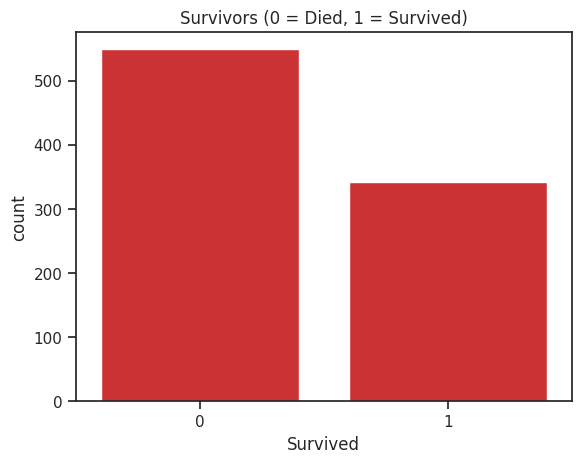


 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_palette("Set1")

sns.countplot(x='Survived', data=df)
plt.title("Survivors (0 = Died, 1 = Survived)")
plt.show()

print("\n", df['Survived'].value_counts(normalize=True))

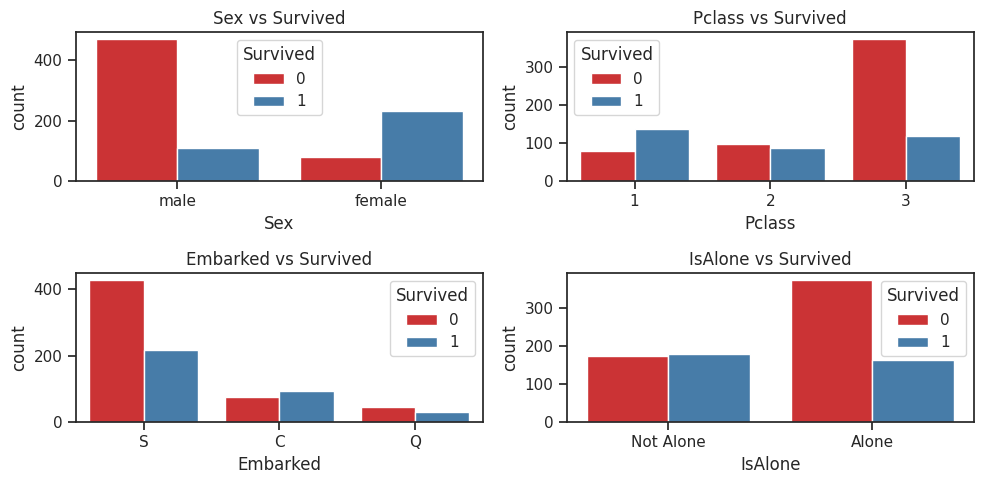

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 2 line, 2 column, w 10, h 5

# 1. Sex vs Survived
sns.countplot(ax=axes[0,0], x='Sex', hue='Survived', data=df)
axes[0,0].set_title('Sex vs Survived')

# 2. Pclass vs Survived
sns.countplot(ax=axes[0,1], x='Pclass', hue='Survived', data=df)
axes[0,1].set_title('Pclass vs Survived')

# 3. Embarked vs Survived
sns.countplot(ax=axes[1,0], x='Embarked', hue='Survived', data=df)
axes[1,0].set_title('Embarked vs Survived')

# 4. IsAlone vs Survived
sns.countplot(ax=axes[1,1], x='IsAlone', hue='Survived', data=df)
axes[1,1].set_title('IsAlone vs Survived')
axes[1,1].set_xticks([0, 1])
axes[1,1].set_xticklabels(['Not Alone', 'Alone'])

plt.tight_layout()
plt.show()

In [133]:
# stats for numeric columns
numeric_summary = df.describe()
print(numeric_summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.143850    0.523008   
std     257.353842    0.486592    0.836071   13.496074    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   36.750000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

## Correlation Matrix
- A correlation matrix is ​​a table that shows the correlations (relationships) between multiple variables. This matrix represents the strength and direction of the linear relationship that each variable has with the other variables. Correlation indicates how strong the relationship is between two variables and whether it is positive or negative.

 - Correlation usually has a value between -1 and 1:

   - 1: A perfect positive relationship between two variables (as one increases, the other increases).
   - -1: A perfect negative relationship between two variables (as one increases, the other decreases).
   - 0: There is no correlation between the two variables (there is no linear relationship between them).

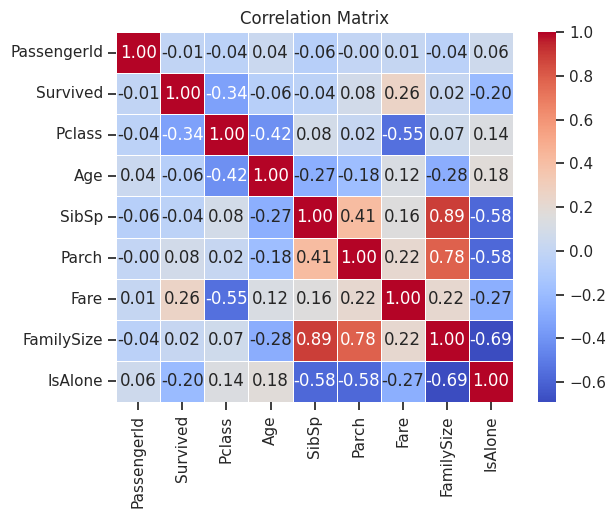

In [134]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model

In [135]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])  # 'Survived' target
y = df['Survived']

## split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (712, 14)
Testing data: (179, 14)


## Prepare Value Set for algorithms

In [136]:
# Drop string columns
df.drop(columns=['Name', 'Sex', 'Ticket', 'Title', 'Cabin', 'Embarked'], inplace=True)

In [137]:
# split x and y
X = df.drop(columns=['Survived'])
y = df['Survived']

# split into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Metrics
- True-False | Positive-Negative
   - True Positives (TP): Examples that the model correctly predicted as positive (survived = 1).

   - True Negatives (TN): Examples that the model correctly predicted as negative class (0). That is, examples that are actually negative (survived = 0) and that the model correctly predicted as dead (0).

  - False Positives (FP): Examples that the model incorrectly predicted as positive (survived = 1), but individuals that did not actually survive (survived = 0).

  - False Negatives (FN): Positive examples that the model incorrectly predicted as negative (survived = 0), that is, individuals that actually survived but were predicted as dead by the model.

1. Precision:
Precision is the ratio of positive examples that the model correctly predicted out of all positive examples.
- A high precision value indicates that the model's positive predictions are correct. If the precision is low, the model is making too many false positive predictions.
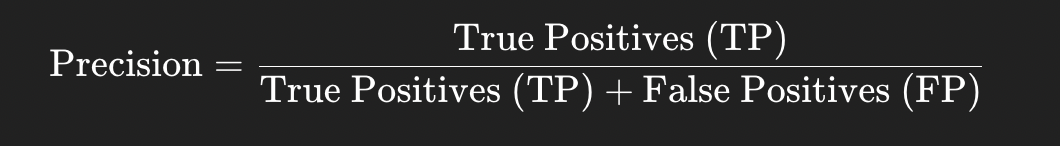
2. Recall:
Recall (also known as Sensitivity or True Positive Rate) shows how many of all true positive examples the model correctly predicted.
- A high recall value indicates that the model correctly predicts true positives. A low recall value indicates that the model incorrectly classifies some survivors as non-survivors.
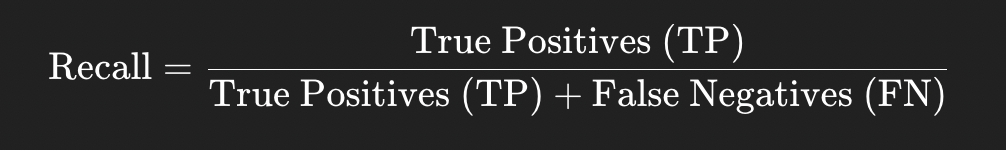
3. F1-Score:
F1-Score is the harmonic mean of precision and recall. It takes both into account by providing a balance between precision and recall. That is, it tries to keep both metrics high.
- F1-Score is important for balancing precision and recall, especially useful when one metric (i.e. precision) is high and the other (recall) is low. A high F1-Score indicates a good model performance.
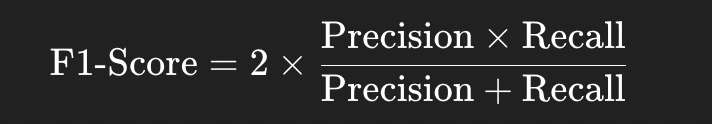
4. Support:
Support is the number of real examples for each class. That is, it gives information about how many real data there are for each class (0 or 1).
Support: The total number of examples that are [True Positives + False Negatives].
Support is often used to understand the *balance of classes*. If one of the classes has a lot of examples, the performance of that class is easier to measure.

## Logistic Regression
- Logistic regression is a *supervised* machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

In [138]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# predict on test set
y_pred_log_reg = log_reg.predict(X_test)

# results
from sklearn.metrics import classification_report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       105
           1       0.83      0.61      0.70        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.78       179



## Decision Tree
- Decision trees are a simple machine learning tool used for classification and regression tasks. They break complex decisions into smaller steps, making them easy to understand and implement.

In [139]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# predict on test set
y_pred_tree = decision_tree.predict(X_test)

# result
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       105
           1       0.59      0.65      0.62        74

    accuracy                           0.66       179
   macro avg       0.66      0.66      0.66       179
weighted avg       0.67      0.66      0.67       179



## Random Forest

- The data set to be analyzed is prepared, *(The set to be analyzed is created, if necessary, data cleaning is performed.)*
- The algorithm creates a decision tree for each sample and the estimated value result of each decision tree is formed,
- Voting is performed for each value formed as a result of the prediction *(Mode for the classification problem, Mean for the regression problem)*
- Finally, the algorithm creates a result by selecting the most voted value for the final prediction.

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model training
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# predict on test set
y_pred_forest = random_forest.predict(X_test)

# Results
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_forest))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       105
           1       0.69      0.66      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



# Model Improvement

1. Hyperparameter Tuning
 - GridSearchCV: Finds the best parameters by performing an exhaustive scan over a given range of hyperparameters. However, it can be expensive in terms of time since each combination must be tested.

 - RandomizedSearchCV: A technique where hyperparameters are randomly selected and the best parameters are found by performing a certain number of trials. It is usually faster, but does not always give the best results because it does not scan the entire search space.

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Logistic Regression parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best hiperparameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# RandomizedSearchCV sample
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

random_search = RandomizedSearchCV(LogisticRegression(), param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Best parameters from GridSearchCV: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best parameters from RandomizedSearchCV: {'C': np.float64(0.2064461305401443), 'max_iter': 100, 'solver': 'liblinear'}


2. Feature Selection
 - Heatmap-Correlation
 - RFE: Recursive Feature Elimination iteratively removes features that affect the accuracy of the model and selects the best features.

In [142]:
from sklearn.feature_selection import RFE

# Model
model = LogisticRegression(max_iter=5000)

# RFE
selector = RFE(model, n_features_to_select=5)  # best 5 features
X_train_rfe = selector.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[selector.support_])


Selected features: Index(['Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone'], dtype='object')


3. Comparing Training and Test Set Performance:

 - If the training set performs very well and the test set performs very poorly, the model is overfitting.

 - If both the training and test sets perform poorly, the model is underfitting.

In [143]:
from sklearn.metrics import accuracy_score

# train set performance
y_train_pred = log_reg.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

#  test set performance
y_test_pred = log_reg.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.7176966292134831
Test Accuracy: 0.7877094972067039


4. K-fold cross-validation helps you assess the accuracy of the model more reliably. This allows the model to be trained and tested on each part by splitting the data into different subsets.

In [144]:
from sklearn.model_selection import cross_val_score

# 5 layered
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.63128492 0.70224719 0.73033708 0.76966292 0.75842697]
Average cross-validation score: 0.7183918147008975
